In [ ]:
%%bash
! pip install Sastrawi
! pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp37-none-any.whl size=6007 sha256=29bc814f5fa5ec52fee88459047141b70db92eb5ae03aace49dbbd971a52b6df
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import KFold
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from timeit import default_timer as timer
from sklearn.model_selection import train_test_split
import re
import pickle

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/SMS Classification Naive Bayes/dataset_sms_spam_.xlsx")
df.head()

,text,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
df.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
df.count()

text     1139
label    1139
dtype: int64

In [ ]:
df.groupby('label').count()

,text
label,
0,568
1,332
2,239


<BarContainer object of 3 artists>

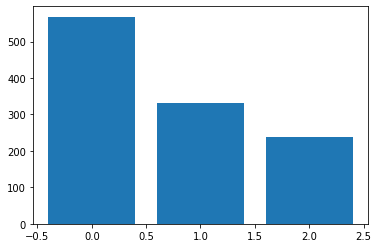

In [ ]:
count = df.groupby('label').count()
count.reset_index(inplace=True)
plt.bar(count['label'],count['text'])

In [ ]:
import time
start_time = time.time()

stemmer = StemmerFactory().create_stemmer()
stem_word = []
for i in df['text']:
  stem = stemmer.stem(i)
  stem_word.append(stem)

print("--- %s seconds ---" % (time.time() - start_time))
print(stem_word[:10])


--- 462.24897813796997 seconds ---
['promo beli paket flash mulai 1gb di my telkomsel app dpt extra kuota 2gb 4g lte dan extra nelpon hingga 100mnt 1hr buru cek di tsel me mytsel1 s k', '2 5 gb 30 hari hanya rp 35 ribu spesial buat anda yang pilih aktif sekarang juga di 550 905 promo sd 30 nov 2015 buru aktif sekarang s k', '2016-07-08 11 47 11 plg yth sisa kuota flash anda 478kb download mytelkomsel apps di http tsel me tsel utk cek kuota beli paket flash atau hub 363', '2016-08-07 11 29 47 plg yth sisa kuota flash anda 7160kb download mytelkomsel apps di http tsel me tsel utk cek kuota beli paket flash atau hub 363', '4 5gb 30 hari hanya rp 55 ribu spesial buat anda yang pilih aktif sekarang juga di 550 907 buru skb', '5 hari lagi ekstra pulsa 50rb dg beli paket internet bulan di mytelkomsel utk beli pertama sjk 25aug-25sept cek detail promo di tsel me mytsel1', 'ada iring dgn tarif rp 01 7hr panjang rp 3190 7hr dari hits armada - curi hati tekan 808 3 1 4 1 lalu ok call info 100 111

In [ ]:
stem_word[:7]

['promo beli paket flash mulai 1gb di my telkomsel app dpt extra kuota 2gb 4g lte dan extra nelpon hingga 100mnt 1hr buru cek di tsel me mytsel1 s k',
 '2 5 gb 30 hari hanya rp 35 ribu spesial buat anda yang pilih aktif sekarang juga di 550 905 promo sd 30 nov 2015 buru aktif sekarang s k',
 '2016-07-08 11 47 11 plg yth sisa kuota flash anda 478kb download mytelkomsel apps di http tsel me tsel utk cek kuota beli paket flash atau hub 363',
 '2016-08-07 11 29 47 plg yth sisa kuota flash anda 7160kb download mytelkomsel apps di http tsel me tsel utk cek kuota beli paket flash atau hub 363',
 '4 5gb 30 hari hanya rp 55 ribu spesial buat anda yang pilih aktif sekarang juga di 550 907 buru skb',
 '5 hari lagi ekstra pulsa 50rb dg beli paket internet bulan di mytelkomsel utk beli pertama sjk 25aug-25sept cek detail promo di tsel me mytsel1',
 'ada iring dgn tarif rp 01 7hr panjang rp 3190 7hr dari hits armada - curi hati tekan 808 3 1 4 1 lalu ok call info 100 111']

In [ ]:
# gabung = pd.DataFrame({'text_stemming': stem_word, 'label': df['label']})
# string = "/content/drive/MyDrive/Colab Notebooks/SMS Classification Naive Bayes/stemming_sms.xlsx"
# gabung.to_excel(excel_writer = string)

In [ ]:
stem_word = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SMS Classification Naive Bayes/stemming_sms.xlsx')
stem_word = stem_word.sort_values(by=['text_stemming'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, decode_error='ignore')
vectorizer.fit(stem_word['text_stemming'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
def Naive_bayes(X_train, X_test, y_train, y_test):
  from sklearn.naive_bayes import MultinomialNB
  multi_nb = MultinomialNB()
 

  multi_nb.fit(vectorizer.transform(X_train), y_train)
  y_pred = multi_nb.predict(vectorizer.transform(X_test))
  score = accuracy_score(y_test, y_pred)
  return score

Kfold 1 0.9298245614035088
Kfold 2 0.9473684210526315
Kfold 3 0.9385964912280702
Kfold 4 0.9429824561403509
Kfold 5 0.9118942731277533
rata-rata =  0.934133240590463


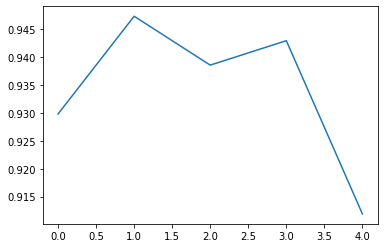

In [ ]:
kf = KFold(n_splits=5, random_state=True, shuffle=True)

train, test = [], []
i = 1
akurasi = []
X = np.arange(len(stem_word))
for train_index, test_index in kf.split(X):
  X_train = stem_word['text_stemming'][train_index]
  X_test = stem_word['text_stemming'][test_index]
  y_train = stem_word['label'][train_index]
  y_test = stem_word['label'][test_index]

  score = Naive_bayes(X_train, X_test, y_train, y_test)
  akurasi.append(score)
  print('Kfold', i ,score)
  i += 1
akurasi = np.array(akurasi)
print('rata-rata = ', (akurasi.sum()/len(akurasi)))

plt.plot(np.arange(len(akurasi)), akurasi)

# Save model using pickle

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(stem_word['text_stemming'], stem_word['label'], test_size=0.001, random_state=4)
print(len(X_train))
print(len(X_test))

1137
2


In [ ]:
from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB()
multi_nb.fit(vectorizer.transform(X_train), y_train)
y_pred = multi_nb.predict(vectorizer.transform(X_test))
score = accuracy_score(y_test, y_pred)
score

0.9118942731277533

In [ ]:
multi_nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

<h2>Save Pickel File

In [ ]:
pkl_filename = "/content/drive/MyDrive/Colab Notebooks/SMS Classification Naive Bayes/pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(multi_nb, file)

<h2>Open Pickle File

In [ ]:
import pickle
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer

stem_word = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SMS Classification Naive Bayes/stemming_sms.xlsx')
stem_word = stem_word.sort_values(by=['text_stemming'])

pkl_filename = "/content/drive/MyDrive/Colab Notebooks/SMS Classification Naive Bayes/pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

test = 'ayah isiin dl plsa as 20rb di no 082315835514 skrng penting'

stemmer = StemmerFactory().create_stemmer()
stem = stemmer.stem(test)

vectorizer = TfidfVectorizer(max_features=1000, decode_error='ignore')
vectorizer.fit(stem_word['text_stemming'])

class_pred = pickle_model.predict(vectorizer.transform([stem]))
if class_pred == 0:
  print('normal')
elif class_pred == 1:
  print('penipuan')
else:
  print('promo')

penipuan


In [ ]:
testing = [
    'sy rudy di malaysia, brencana investasikan dana sy sbgai bekal hidup di indo,sy butuh org yg bisa sy percayakan uang sy rm 5jt,bila brsedia,sms di 085340046549',
    'telkomsel(777) kejutan poin hadiah rp.15jt resmi diberikan u/pemilik no. 08128824xxxx pin-b6ba247 u/info hub: pt.telkomsel  021-40225678 021-40333456',
    'ayah isiin dl plsa as 20rb di no 082315835514 skrng penting',
    'ass,maaf sy yg berminat dgn lokasi yg ditawarkan, dan sy sdh merasa cocok masalah hrganya tolong hubungi a/sms suami sy h.handoko hp;081524095427 trmksh.',
    'gua tangtang lu di kedung halang talang bogor setelah lebaran .',
    'Hai sayang, apa kabar',
    'Jangan lupa besok pagi ada meeting di tempat client!',
    'promo ramadhan pnjaman dna cash 100jt - 5m - dgn jaminan bpkb mobil - bs menggunakan krtu-kredit dgn bnga 1.11% minat hub : wijaya 085311466524 - 085814517417',
    'paket berdua diskon 45%. ayam+chicken strips+2 nasi+2 minum hanya 35rb nett. tkr sms ini di cfc stasiun kota hingga 30mar. stok terbatas. promo *606#'
]

from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB()
multi_nb.fit(vectorizer.transform(X_train), y_train)

for i in testing:
  class_pred = multi_nb.predict(vectorizer.transform([i]))
  print(i)
  if class_pred == 0:
    print('normal')
  elif class_pred == 1:
    print('penipuan')
  else:
    print('promo')
  print()

sy rudy di malaysia, brencana investasikan dana sy sbgai bekal hidup di indo,sy butuh org yg bisa sy percayakan uang sy rm 5jt,bila brsedia,sms di 085340046549
penipuan

telkomsel(777) kejutan poin hadiah rp.15jt resmi diberikan u/pemilik no. 08128824xxxx pin-b6ba247 u/info hub: pt.telkomsel  021-40225678 021-40333456
penipuan

ayah isiin dl plsa as 20rb di no 082315835514 skrng penting
penipuan

ass,maaf sy yg berminat dgn lokasi yg ditawarkan, dan sy sdh merasa cocok masalah hrganya tolong hubungi a/sms suami sy h.handoko hp;081524095427 trmksh.
penipuan

gua tangtang lu di kedung halang talang bogor setelah lebaran .
normal

Hai sayang, apa kabar
normal

Jangan lupa besok pagi ada meeting di tempat client!
normal

promo ramadhan pnjaman dna cash 100jt - 5m - dgn jaminan bpkb mobil - bs menggunakan krtu-kredit dgn bnga 1.11% minat hub : wijaya 085311466524 - 085814517417
penipuan

paket berdua diskon 45%. ayam+chicken strips+2 nasi+2 minum hanya 35rb nett. tkr sms ini di cfc stasiun 

# percobaan yang laen

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = np.arange(len(stem_word))
kf = KFold(n_splits=5, random_state=True, shuffle=True)

train, test = [], []
i = 1
akurasi = []
for train_index, test_index in kf.split(X):
  X_train = stem_word['text_stemming'][train_index]
  X_test = stem_word['text_stemming'][test_index]
  y_train = stem_word['label'][train_index]
  y_test = stem_word['label'][test_index]

  random_forest = RandomForestClassifier(max_depth=90, random_state=5)
  random_forest.fit(vectorizer.transform(X_train), y_train)
  y_pred = random_forest.predict(vectorizer.transform(X_test))
  score = accuracy_score(y_test, y_pred)
  akurasi.append(score)
  print('Kfold', i ,score)
  i += 1
akurasi = np.array(akurasi)
print('rata-rata = ', (akurasi.sum()/len(akurasi)))

Kfold 1 0.9210526315789473
Kfold 2 0.9429824561403509
Kfold 3 0.9122807017543859
Kfold 4 0.9298245614035088
Kfold 5 0.9118942731277533
rata-rata =  0.9236069248009893


In [ ]:
from sklearn.linear_model import LogisticRegression
X = np.arange(len(stem_word))
kf = KFold(n_splits=5, random_state=True, shuffle=True)

train, test = [], []
i = 1
akurasi = []
for train_index, test_index in kf.split(X):
  X_train = stem_word['text_stemming'][train_index]
  X_test = stem_word['text_stemming'][test_index]
  y_train = stem_word['label'][train_index]
  y_test = stem_word['label'][test_index]

  log_res = LogisticRegression()
  log_res.fit(vectorizer.transform(X_train), y_train)

  y_pred = log_res.predict(vectorizer.transform(X_test))
  score = accuracy_score(y_test, y_pred)
  akurasi.append(score)
  print('Kfold', i ,score)
  i += 1
akurasi = np.array(akurasi)
print('rata-rata = ', (akurasi.sum()/len(akurasi)))

Kfold 1 0.9210526315789473
Kfold 2 0.956140350877193
Kfold 3 0.9254385964912281
Kfold 4 0.9342105263157895
Kfold 5 0.9295154185022027
rata-rata =  0.9332715047530721


In [ ]:
testing = [
    'sy rudy di malaysia, brencana investasikan dana sy sbgai bekal hidup di indo,sy butuh org yg bisa sy percayakan uang sy rm 5jt,bila brsedia,sms di 085340046549',
    'telkomsel(777) kejutan poin hadiah rp.15jt resmi diberikan u/pemilik no. 08128824xxxx pin-b6ba247 u/info hub: pt.telkomsel  021-40225678 021-40333456',
    'ayah isiin dl plsa as 20rb di no 082315835514 skrng penting',
    'ass,maaf sy yg berminat dgn lokasi yg ditawarkan, dan sy sdh merasa cocok masalah hrganya tolong hubungi a/sms suami sy h.handoko hp;081524095427 trmksh.',
    'gua tangtang lu di kedung halang talang bogor setelah lebaran .',
    'lg smsn sama cewenya enggak?',
    'piye kabare COK!',
    'promo ramadhan pnjaman dna cash 100jt - 5m - dgn jaminan bpkb mobil - bs menggunakan krtu-kredit dgn bnga 1.11% minat hub : wijaya 085311466524 - 085814517417',
    'paket berdua diskon 45%. ayam+chicken strips+2 nasi+2 minum hanya 35rb nett. tkr sms ini di cfc stasiun kota hingga 30mar. stok terbatas. promo *606#'
]

for i in testing:
  class_pred = multi_nb.predict(vectorizer.transform([i]))
  print(i)
  if class_pred == 0:
    print('normal')
  elif class_pred == 1:
    print('penipuan')
  else:
    print('promo')
  print()

sy rudy di malaysia, brencana investasikan dana sy sbgai bekal hidup di indo,sy butuh org yg bisa sy percayakan uang sy rm 5jt,bila brsedia,sms di 085340046549
penipuan

telkomsel(777) kejutan poin hadiah rp.15jt resmi diberikan u/pemilik no. 08128824xxxx pin-b6ba247 u/info hub: pt.telkomsel  021-40225678 021-40333456
penipuan

ayah isiin dl plsa as 20rb di no 082315835514 skrng penting
penipuan

ass,maaf sy yg berminat dgn lokasi yg ditawarkan, dan sy sdh merasa cocok masalah hrganya tolong hubungi a/sms suami sy h.handoko hp;081524095427 trmksh.
penipuan

gua tangtang lu di kedung halang talang bogor setelah lebaran .
normal

lg smsn sama cewenya enggak?
normal

piye kabare COK!
normal

promo ramadhan pnjaman dna cash 100jt - 5m - dgn jaminan bpkb mobil - bs menggunakan krtu-kredit dgn bnga 1.11% minat hub : wijaya 085311466524 - 085814517417
penipuan

paket berdua diskon 45%. ayam+chicken strips+2 nasi+2 minum hanya 35rb nett. tkr sms ini di cfc stasiun kota hingga 30mar. stok terba